<a href="https://colab.research.google.com/github/dhanushkasisil2700/Binary-Prediction-of-Poisonous-Mushrooms/blob/main/ETH_Coin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# ETH Data

In [ ]:
import yfinance as yf

eth = yf.Ticker("ETH-USD")
eth_data = eth.history(period="5y")  # Retrieves 1 year of data

In [ ]:
eth_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-27 00:00:00+00:00,179.932632,188.155334,177.682358,184.242218,10815941952,0.0,0.0
2019-10-28 00:00:00+00:00,184.397507,187.883163,180.249557,182.662811,10406734124,0.0,0.0
2019-10-29 00:00:00+00:00,182.670380,191.846756,182.364365,190.342575,10622761958,0.0,0.0
2019-10-30 00:00:00+00:00,190.336395,191.111938,181.546371,184.692169,10484902804,0.0,0.0
2019-10-31 00:00:00+00:00,184.797623,188.751266,180.068359,183.966919,9607939606,0.0,0.0


In [ ]:
eth_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-10-27 00:00:00+00:00 to 2024-10-27 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1828 non-null   float64
 1   High          1828 non-null   float64
 2   Low           1828 non-null   float64
 3   Close         1828 non-null   float64
 4   Volume        1828 non-null   int64  
 5   Dividends     1828 non-null   float64
 6   Stock Splits  1828 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 114.2 KB


# BTC Data

In [ ]:
btc = yf.Ticker("BTC-USD")
btc_data = btc.history(period="5y")

In [ ]:
btc_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-27 00:00:00+00:00,9241.707031,9749.529297,9112.541992,9551.714844,32593129501,0.0,0.0
2019-10-28 00:00:00+00:00,9565.101562,9805.118164,9256.148438,9256.148438,30948255332,0.0,0.0
2019-10-29 00:00:00+00:00,9248.440430,9516.180664,9232.648438,9427.687500,28426779937,0.0,0.0
2019-10-30 00:00:00+00:00,9422.462891,9426.874023,9085.370117,9205.726562,27706531577,0.0,0.0
2019-10-31 00:00:00+00:00,9202.458008,9383.161133,9028.717773,9199.584961,26583653947,0.0,0.0


In [ ]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-10-27 00:00:00+00:00 to 2024-10-27 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1828 non-null   float64
 1   High          1828 non-null   float64
 2   Low           1828 non-null   float64
 3   Close         1828 non-null   float64
 4   Volume        1828 non-null   int64  
 5   Dividends     1828 non-null   float64
 6   Stock Splits  1828 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 114.2 KB


# Data Cleaning

In [ ]:
eth_data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
btc_data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [ ]:
eth_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-27 00:00:00+00:00,179.932632,188.155334,177.682358,184.242218,10815941952
2019-10-28 00:00:00+00:00,184.397507,187.883163,180.249557,182.662811,10406734124
2019-10-29 00:00:00+00:00,182.670380,191.846756,182.364365,190.342575,10622761958
2019-10-30 00:00:00+00:00,190.336395,191.111938,181.546371,184.692169,10484902804
2019-10-31 00:00:00+00:00,184.797623,188.751266,180.068359,183.966919,9607939606


In [ ]:
btc_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-27 00:00:00+00:00,9241.707031,9749.529297,9112.541992,9551.714844,32593129501
2019-10-28 00:00:00+00:00,9565.101562,9805.118164,9256.148438,9256.148438,30948255332
2019-10-29 00:00:00+00:00,9248.440430,9516.180664,9232.648438,9427.687500,28426779937
2019-10-30 00:00:00+00:00,9422.462891,9426.874023,9085.370117,9205.726562,27706531577
2019-10-31 00:00:00+00:00,9202.458008,9383.161133,9028.717773,9199.584961,26583653947


In [ ]:
#convert Date column
eth_data.index = pd.to_datetime(eth_data.index)
btc_data.index = pd.to_datetime(btc_data.index)

In [ ]:
#convert Date column to YYYYMMDD column
eth_data['Date'] = eth_data.index.strftime('%Y%m%d')
btc_data['Date'] = btc_data.index.strftime('%Y%m%d')

In [ ]:
eth_data.head()

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2019-10-27 00:00:00+00:00,179.932632,188.155334,177.682358,184.242218,10815941952,20191027
2019-10-28 00:00:00+00:00,184.397507,187.883163,180.249557,182.662811,10406734124,20191028
2019-10-29 00:00:00+00:00,182.670380,191.846756,182.364365,190.342575,10622761958,20191029
2019-10-30 00:00:00+00:00,190.336395,191.111938,181.546371,184.692169,10484902804,20191030
2019-10-31 00:00:00+00:00,184.797623,188.751266,180.068359,183.966919,9607939606,20191031


In [ ]:
#drop time from index column
eth_data.index = eth_data.index.date
btc_data.index = btc_data.index.date

In [ ]:
eth_data.head()

,Open,High,Low,Close,Volume,Date
2019-10-27,179.932632,188.155334,177.682358,184.242218,10815941952,20191027
2019-10-28,184.397507,187.883163,180.249557,182.662811,10406734124,20191028
2019-10-29,182.670380,191.846756,182.364365,190.342575,10622761958,20191029
2019-10-30,190.336395,191.111938,181.546371,184.692169,10484902804,20191030
2019-10-31,184.797623,188.751266,180.068359,183.966919,9607939606,20191031


In [ ]:
btc_data.head()

,Open,High,Low,Close,Volume,Date
2019-10-27,9241.707031,9749.529297,9112.541992,9551.714844,32593129501,20191027
2019-10-28,9565.101562,9805.118164,9256.148438,9256.148438,30948255332,20191028
2019-10-29,9248.440430,9516.180664,9232.648438,9427.687500,28426779937,20191029
2019-10-30,9422.462891,9426.874023,9085.370117,9205.726562,27706531577,20191030
2019-10-31,9202.458008,9383.161133,9028.717773,9199.584961,26583653947,20191031


In [ ]:
eth_data.drop(['Date'], axis=1, inplace=True)
btc_data.drop(['Date'], axis=1, inplace=True)

In [ ]:
eth_data.head()

,Open,High,Low,Close,Volume
2019-10-27,179.932632,188.155334,177.682358,184.242218,10815941952
2019-10-28,184.397507,187.883163,180.249557,182.662811,10406734124
2019-10-29,182.670380,191.846756,182.364365,190.342575,10622761958
2019-10-30,190.336395,191.111938,181.546371,184.692169,10484902804
2019-10-31,184.797623,188.751266,180.068359,183.966919,9607939606


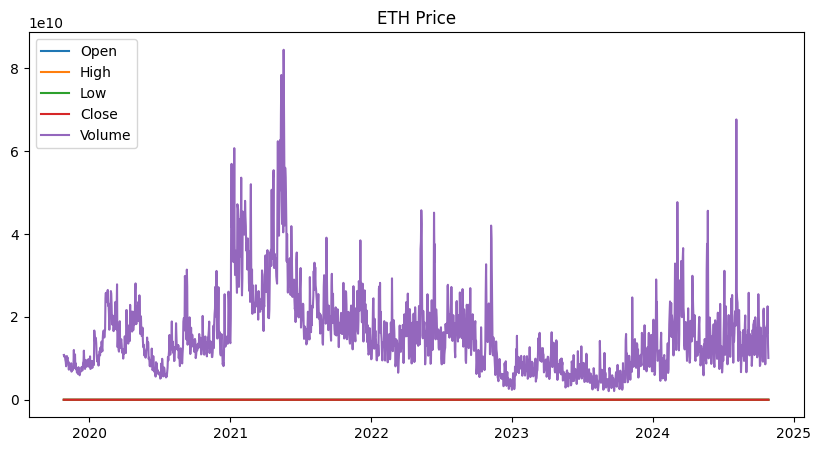

In [ ]:
#plot etc
eth_data.plot(figsize=(10, 5))
plt.title('ETH Price')
plt.show()

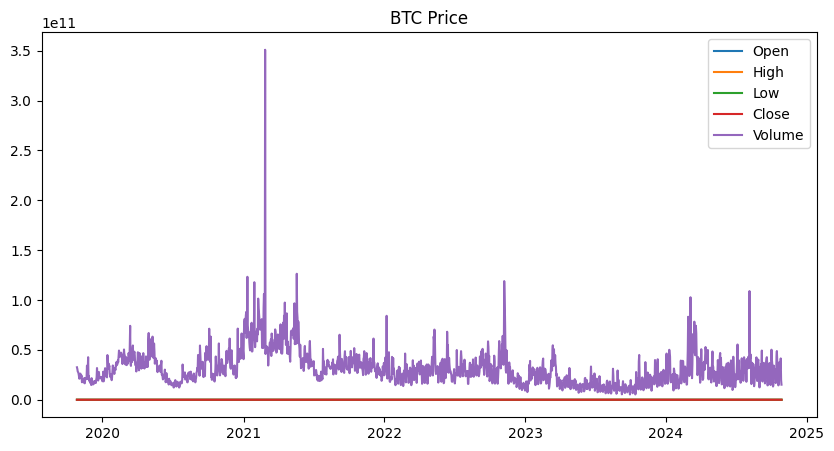

In [ ]:
#plot btc
btc_data.plot(figsize=(10, 5))
plt.title('BTC Price')
plt.show()

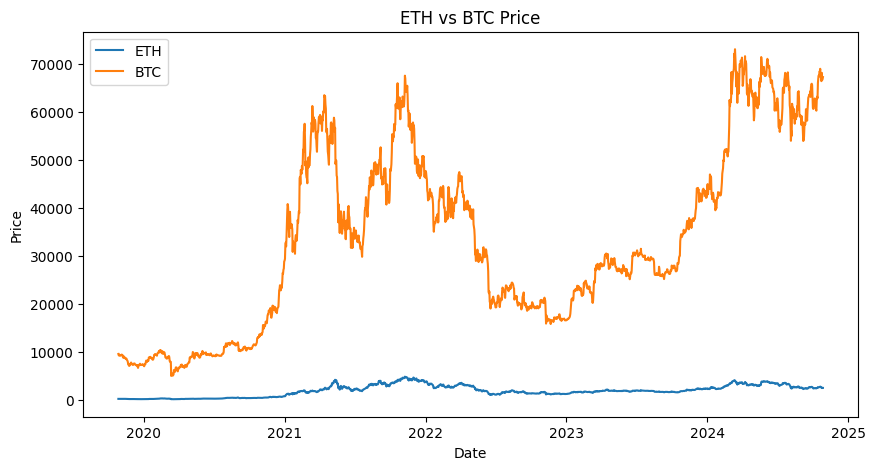

In [ ]:
#plot close price
fig = plt.figure(figsize=(10, 5))
plt.plot(eth_data['Close'], label='ETH')
plt.plot(btc_data['Close'], label='BTC')
plt.title('ETH vs BTC Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
#create candlestick figure
fig = go.Figure(data=[go.Candlestick(x=eth_data.index,
                open=eth_data['Open'],
                high=eth_data['High'],
                low=eth_data['Low'],
                close=eth_data['Close'])])

#update layout
fig.update_layout(title='ETH Price',
                  xaxis_title='Date',
                  yaxis_title='Price')

#show figure
fig.show()

In [ ]:
#create candlestick figure
fig = go.Figure(data=[go.Candlestick(x=btc_data.index,
                open=btc_data['Open'],
                high=btc_data['High'],
                low=btc_data['Low'],
                close=btc_data['Close'])])

#update layout
fig.update_layout(title='BTC Price',
                  xaxis_title='Date',
                  yaxis_title='Price')

#show figure
fig.show()

In [ ]:
#merge datasets using index
merged_data = pd.merge(eth_data, btc_data, left_index=True, right_index=True, suffixes=('_eth', '_btc'))

In [ ]:
merged_data.head()

,Open_eth,High_eth,Low_eth,Close_eth,Volume_eth,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc
2019-10-27,179.932632,188.155334,177.682358,184.242218,10815941952,9241.707031,9749.529297,9112.541992,9551.714844,32593129501
2019-10-28,184.397507,187.883163,180.249557,182.662811,10406734124,9565.101562,9805.118164,9256.148438,9256.148438,30948255332
2019-10-29,182.670380,191.846756,182.364365,190.342575,10622761958,9248.440430,9516.180664,9232.648438,9427.687500,28426779937
2019-10-30,190.336395,191.111938,181.546371,184.692169,10484902804,9422.462891,9426.874023,9085.370117,9205.726562,27706531577
2019-10-31,184.797623,188.751266,180.068359,183.966919,9607939606,9202.458008,9383.161133,9028.717773,9199.584961,26583653947


In [ ]:
#shift Close_eth
merged_data['Next_day_eth'] = merged_data['Close_eth'].shift(-1)

In [ ]:
merged_data.head()

,Open_eth,High_eth,Low_eth,Close_eth,Volume_eth,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Next_day_eth
2019-10-27,179.932632,188.155334,177.682358,184.242218,10815941952,9241.707031,9749.529297,9112.541992,9551.714844,32593129501,182.662811
2019-10-28,184.397507,187.883163,180.249557,182.662811,10406734124,9565.101562,9805.118164,9256.148438,9256.148438,30948255332,190.342575
2019-10-29,182.670380,191.846756,182.364365,190.342575,10622761958,9248.440430,9516.180664,9232.648438,9427.687500,28426779937,184.692169
2019-10-30,190.336395,191.111938,181.546371,184.692169,10484902804,9422.462891,9426.874023,9085.370117,9205.726562,27706531577,183.966919
2019-10-31,184.797623,188.751266,180.068359,183.966919,9607939606,9202.458008,9383.161133,9028.717773,9199.584961,26583653947,183.969894


In [ ]:
test_data_lenght = int(len(merged_data) * 0.2)
test_data_lenght

365

# Train base model

In [ ]:
base_model_df = merged_data.copy()
base_model_df.head()

,Open_eth,High_eth,Low_eth,Close_eth,Volume_eth,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Next_day_eth
2019-10-27,179.932632,188.155334,177.682358,184.242218,10815941952,9241.707031,9749.529297,9112.541992,9551.714844,32593129501,182.662811
2019-10-28,184.397507,187.883163,180.249557,182.662811,10406734124,9565.101562,9805.118164,9256.148438,9256.148438,30948255332,190.342575
2019-10-29,182.670380,191.846756,182.364365,190.342575,10622761958,9248.440430,9516.180664,9232.648438,9427.687500,28426779937,184.692169
2019-10-30,190.336395,191.111938,181.546371,184.692169,10484902804,9422.462891,9426.874023,9085.370117,9205.726562,27706531577,183.966919
2019-10-31,184.797623,188.751266,180.068359,183.966919,9607939606,9202.458008,9383.161133,9028.717773,9199.584961,26583653947,183.969894


In [ ]:
base_model_train = base_model_df.iloc[:-test_data_lenght]
base_model_test = base_model_df.iloc[-test_data_lenght:]

In [ ]:
print(base_model_train.shape)
print(base_model_test.shape)

(1463, 11)
(365, 11)


In [ ]:
base_model_train_target = base_model_train['Next_day_eth']
base_model_test_target = base_model_test['Next_day_eth']

In [ ]:
base_model_train.drop(['Next_day_eth'], axis=1, inplace=True)
base_model_test.drop(['Next_day_eth'], axis=1, inplace=True)

<ipython-input-36-718323522850>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-718323522850>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#train xgboosting
from xgboost import XGBRegressor

base_model = XGBRegressor()
base_model.fit(base_model_train, base_model_train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
base_model_test.isna().sum()

,0
Open_eth,0
High_eth,0
Low_eth,0
Close_eth,0
Volume_eth,0
Open_btc,0
High_btc,0
Low_btc,0
Close_btc,0
Volume_btc,0


In [ ]:
base_model_test_target.isna().sum()

1

In [ ]:
#drop last value
base_model_test = base_model_test.iloc[:-1]
base_model_test_target = base_model_test_target.iloc[:-1]

In [ ]:
#predict and accuracy
predicts = base_model.predict(base_model_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(base_model_test_target, predicts))
print(rmse)

124.79385361519968


In [ ]:
#reindex predicts and base_model_target
predicts = pd.Series(predicts, index=base_model_test_target.index)
base_model_test_target = pd.Series(base_model_test_target, index=base_model_test_target.index)

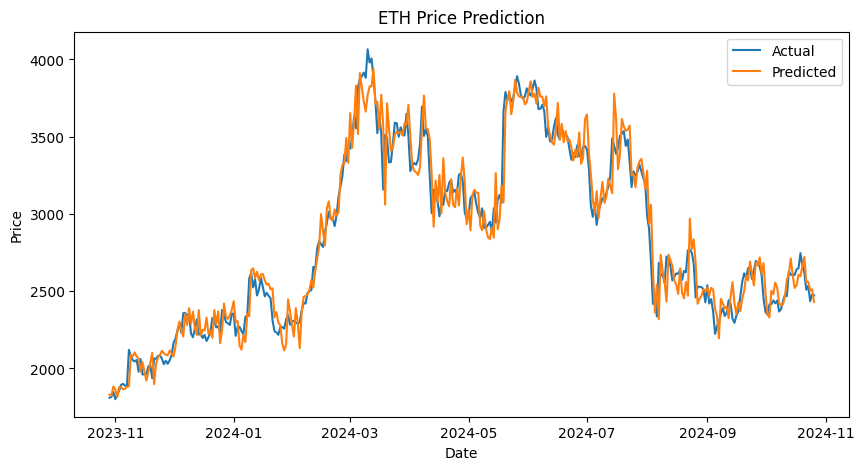

In [ ]:
#plot predict vs actual
plt.figure(figsize=(10, 5))
plt.plot(base_model_test_target, label='Actual')
plt.plot(predicts, label='Predicted')
plt.title('ETH Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Feature Engineering

In [ ]:
feature_df = merged_data.copy()

In [ ]:
feature_df.head()

,Open_eth,High_eth,Low_eth,Close_eth,Volume_eth,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Next_day_eth
2019-10-27,179.932632,188.155334,177.682358,184.242218,10815941952,9241.707031,9749.529297,9112.541992,9551.714844,32593129501,182.662811
2019-10-28,184.397507,187.883163,180.249557,182.662811,10406734124,9565.101562,9805.118164,9256.148438,9256.148438,30948255332,190.342575
2019-10-29,182.670380,191.846756,182.364365,190.342575,10622761958,9248.440430,9516.180664,9232.648438,9427.687500,28426779937,184.692169
2019-10-30,190.336395,191.111938,181.546371,184.692169,10484902804,9422.462891,9426.874023,9085.370117,9205.726562,27706531577,183.966919
2019-10-31,184.797623,188.751266,180.068359,183.966919,9607939606,9202.458008,9383.161133,9028.717773,9199.584961,26583653947,183.969894


In [ ]:
#drop last value
feature_df = feature_df.iloc[:-1]

In [ ]:
#moving average for past 3 days
feature_df['eth_MA_3'] = feature_df['Close_eth'].rolling(window=3).mean()
feature_df['btc_MA_3'] = feature_df['Close_btc'].rolling(window=3).mean()
feature_df['eth_MA_3_open'] = feature_df['Open_eth'].rolling(window=3).mean()
feature_df['btc_MA_3_open'] = feature_df['Open_btc'].rolling(window=3).mean()

feature_df['eth_MA_7'] = feature_df['Close_eth'].rolling(window=7).mean()
feature_df['btc_MA_7'] = feature_df['Close_btc'].rolling(window=7).mean()
feature_df['eth_MA_7_open'] = feature_df['Open_eth'].rolling(window=7).mean()
feature_df['btc_MA_7_open'] = feature_df['Open_btc'].rolling(window=7).mean()

<ipython-input-47-12d71dfba310>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-12d71dfba310>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-12d71dfba310>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-12d71df

In [ ]:
#Rolling Standard Deviation
feature_df['eth_std_3'] = feature_df['Close_eth'].rolling(window=3).std()
feature_df['btc_std_3'] = feature_df['Close_btc'].rolling(window=3).std()
feature_df['eth_std_3_open'] = feature_df['Open_eth'].rolling(window=3).std()
feature_df['btc_std_3_open'] = feature_df['Open_btc'].rolling(window=3).std()

feature_df['eth_std_7'] = feature_df['Close_eth'].rolling(window=7).std()
feature_df['btc_std_7'] = feature_df['Close_btc'].rolling(window=7).std()
feature_df['eth_std_7_open'] = feature_df['Open_eth'].rolling(window=7).std()
feature_df['btc_std_7_open'] = feature_df['Open_btc'].rolling(window=7).std()

<ipython-input-48-58e5f0b299f6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-58e5f0b299f6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-58e5f0b299f6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-58e5f0b

In [ ]:
#price ratio
feature_df['eth_btc_ratio'] = feature_df['Close_eth'] / feature_df['Close_btc']

In [ ]:
#Volume Moving Average
feature_df['eth_volume_MA_3'] = feature_df['Volume_eth'].rolling(window=3).mean()
feature_df['btc_volume_MA_3'] = feature_df['Volume_btc'].rolling(window=3).mean()

feature_df['eth_volume_MA_7'] = feature_df['Volume_eth'].rolling(window=7).mean()
feature_df['btc_volume_MA_7'] = feature_df['Volume_btc'].rolling(window=7).mean()

In [ ]:
feature_df.head()

,Open_eth,High_eth,Low_eth,Close_eth,Volume_eth,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,...,btc_std_3_open,eth_std_7,btc_std_7,eth_std_7_open,btc_std_7_open,eth_btc_ratio,eth_volume_MA_3,btc_volume_MA_3,eth_volume_MA_7,btc_volume_MA_7
2019-10-27,179.932632,188.155334,177.682358,184.242218,10815941952,9241.707031,9749.529297,9112.541992,9551.714844,32593129501,...,NaN,NaN,NaN,NaN,NaN,0.019289,NaN,NaN,NaN,NaN
2019-10-28,184.397507,187.883163,180.249557,182.662811,10406734124,9565.101562,9805.118164,9256.148438,9256.148438,30948255332,...,NaN,NaN,NaN,NaN,NaN,0.019734,NaN,NaN,NaN,NaN
2019-10-29,182.670380,191.846756,182.364365,190.342575,10622761958,9248.440430,9516.180664,9232.648438,9427.687500,28426779937,...,184.798825,NaN,NaN,NaN,NaN,0.020190,1.061515e+10,3.065605e+10,NaN,NaN
2019-10-30,190.336395,191.111938,181.546371,184.692169,10484902804,9422.462891,9426.874023,9085.370117,9205.726562,27706531577,...,158.589554,NaN,NaN,NaN,NaN,0.020063,1.050480e+10,2.902719e+10,NaN,NaN
2019-10-31,184.797623,188.751266,180.068359,183.966919,9607939606,9202.458008,9383.161133,9028.717773,9199.584961,26583653947,...,116.046218,NaN,NaN,NaN,NaN,0.019997,1.023853e+10,2.757232e+10,NaN,NaN


In [ ]:
feature_df.isna().sum()

,0
Open_eth,0
High_eth,0
Low_eth,0
Close_eth,0
Volume_eth,0
Open_btc,0
High_btc,0
Low_btc,0
Close_btc,0
Volume_btc,0


In [ ]:
#drop na rows
feature_df.dropna(inplace=True)

In [ ]:
feature_df.isna().sum()

,0
Open_eth,0
High_eth,0
Low_eth,0
Close_eth,0
Volume_eth,0
Open_btc,0
High_btc,0
Low_btc,0
Close_btc,0
Volume_btc,0


In [ ]:
test_data_lenght = int(len(feature_df) * 0.2)
test_data_lenght

364

In [ ]:
train_df = feature_df.iloc[:-test_data_lenght]
test_df = feature_df.iloc[-test_data_lenght:]

In [ ]:
train_target_df = train_df['Next_day_eth']
test_target_df = test_df['Next_day_eth']

train_df.drop(['Next_day_eth'], axis=1, inplace=True)
test_df.drop(['Next_day_eth'], axis=1, inplace=True)

<ipython-input-57-4df69d14d651>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-4df69d14d651>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#train xgboosting

model = XGBRegressor()
model.fit(train_df, train_target_df)

predicts = model.predict(test_df)
rmse = np.sqrt(mean_squared_error(test_target_df, predicts))
print(rmse)

159.62658260160651


In [ ]:
#reindex
predicts = pd.Series(predicts, index=test_target_df.index)
test_target_df = pd.Series(test_target_df, index=test_target_df.index)

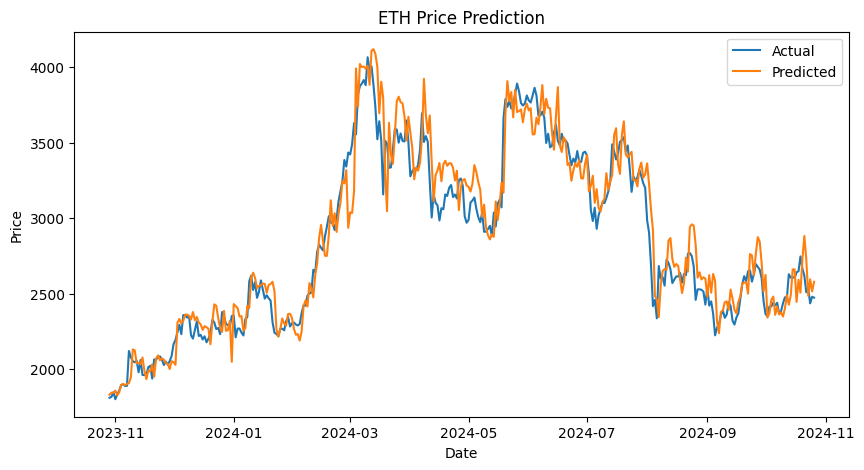

In [ ]:
#plot predicts vs actual
fig = plt.figure(figsize=(10, 5))
plt.plot(test_target_df, label='Actual')
plt.plot(predicts, label='Predicted')
plt.title('ETH Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Train Model with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(train_df, train_target_df)

predicts = model_rf.predict(test_df)
rmse = np.sqrt(mean_squared_error(test_target_df, predicts))
print(rmse)

132.05506911641666


In [ ]:
#reindex
predicts = pd.Series(predicts, index=test_target_df.index)
test_target_df = pd.Series(test_target_df, index=test_target_df.index)

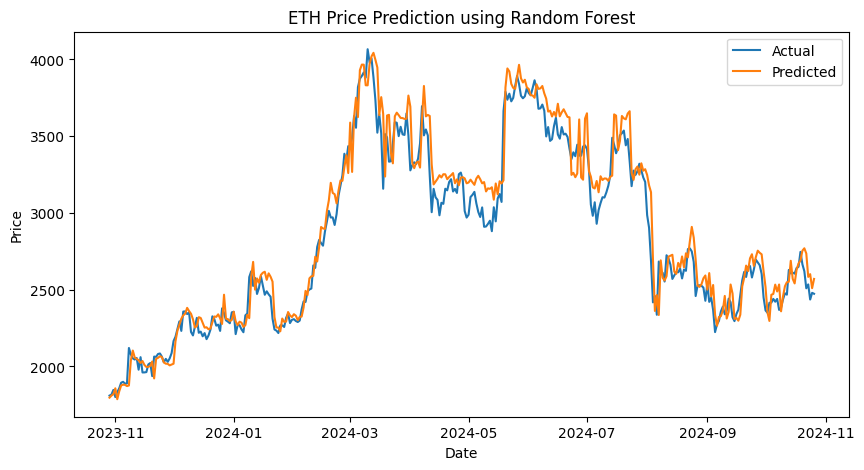

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.plot(test_target_df, label='Actual')
plt.plot(predicts, label='Predicted')
plt.title('ETH Price Prediction using Random Forest')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Feature Engineering using Indicators

In [ ]:
df_indicators = feature_df.copy()

In [ ]:
df_indicators.head()

,Open_eth,High_eth,Low_eth,Close_eth,Volume_eth,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,...,btc_std_3_open,eth_std_7,btc_std_7,eth_std_7_open,btc_std_7_open,eth_btc_ratio,eth_volume_MA_3,btc_volume_MA_3,eth_volume_MA_7,btc_volume_MA_7
2019-11-02,184.018158,185.708954,182.797668,183.925720,8087991830,9259.783203,9377.486328,9249.587891,9324.717773,21242676385,...,35.791772,2.508389,129.350427,3.129099,137.560491,0.019725,8.947181e+09,2.405034e+10,9.881698e+09,2.740367e+10
2019-11-03,183.994827,185.024216,179.818146,182.425018,8760247744,9324.787109,9379.806641,9141.251953,9235.354492,21132220847,...,65.397856,2.668170,79.959397,2.502537,134.760191,0.019753,8.664617e+09,2.223320e+10,9.588027e+09,2.576640e+10
2019-11-04,182.319031,188.022934,181.821609,186.355194,10551917945,9235.607422,9505.051758,9191.485352,9412.612305,26170255634,...,46.121204,2.592355,94.957521,2.683305,79.934187,0.019798,9.133386e+09,2.284838e+10,9.608768e+09,2.508383e+10
2019-11-05,186.309311,191.257828,184.331985,189.304169,10024177342,9413.004883,9457.417969,9256.931641,9342.527344,26198609048,...,88.699165,2.249131,79.332561,2.606965,95.367468,0.020263,9.778781e+09,2.450036e+10,9.523255e+09,2.476552e+10
2019-11-06,189.113495,193.547256,188.667679,191.593842,10156458684,9340.864258,9423.237305,9305.909180,9360.879883,23133895765,...,89.212415,3.357641,75.706947,2.206430,80.802666,0.020468,1.024418e+10,2.516759e+10,9.476335e+09,2.411229e+10


Fibonacci Retracement Levels

In [ ]:
#Fibonacci Retracement Levels
df_indicators['eth_fib_1'] = df_indicators['Close_eth'] * 0.236
df_indicators['eth_fib_2'] = df_indicators['Close_eth'] * 0.382
df_indicators['eth_fib_3'] = df_indicators['Close_eth'] * 0.61

df_indicators['btc_fib_1'] = df_indicators['Close_btc'] * 0.236
df_indicators['btc_fib_2'] = df_indicators['Close_btc'] * 0.382
df_indicators['btc_fib_3'] = df_indicators['Close_btc'] * 0.61

df_indicators['eth_fib_1_open'] = df_indicators['Open_eth'] * 0.236
df_indicators['eth_fib_2_open'] = df_indicators['Open_eth'] * 0.382
df_indicators['eth_fib_3_open'] = df_indicators['Open_eth'] * 0.61

df_indicators['btc_fib_1_open'] = df_indicators['Open_btc'] * 0.236
df_indicators['btc_fib_2_open'] = df_indicators['Open_btc'] * 0.382
df_indicators['btc_fib_3_open'] = df_indicators['Open_btc'] * 0.61

df_indicators['eth_fib_1_volume'] = df_indicators['Volume_eth'] * 0.236
df_indicators['eth_fib_2_volume'] = df_indicators['Volume_eth'] * 0.382
df_indicators['eth_fib_3_volume'] = df_indicators['Volume_eth'] * 0.61

df_indicators['btc_fib_1_volume'] = df_indicators['Volume_btc'] * 0.236
df_indicators['btc_fib_2_volume'] = df_indicators['Volume_btc'] * 0.382
df_indicators['btc_fib_3_volume'] = df_indicators['Volume_btc'] * 0.61

In [ ]:
def model_train(df, model):
  test_data_lenght = int(len(df) * 0.2)

  train_df = df.iloc[:-test_data_lenght]
  test_df = df.iloc[-test_data_lenght:]

  train_df.dropna(inplace=True)
  test_df.dropna(inplace=True)

  train_target_df = train_df['Next_day_eth']
  test_target_df = test_df['Next_day_eth']

  train_df.drop(columns=['Next_day_eth'], axis=1, inplace=True)
  test_df.drop(columns=['Next_day_eth'], axis=1, inplace=True)

  model.fit(train_df, train_target_df)

  predicts = model.predict(test_df)
  rmse = np.sqrt(mean_squared_error(test_target_df, predicts))
  print("RMSE :" ,rmse)

  #reindex
  predicts = pd.Series(predicts, index=test_target_df.index)
  test_target_df = pd.Series(test_target_df, index=test_target_df.index)

  print("Model Score :" ,model.score(test_df, test_target_df))
  print(" ")

  fig = plt.figure(figsize=(10, 5))
  plt.plot(test_target_df, label='Actual')
  plt.plot(predicts, label='Predicted')
  plt.title('ETH Price Prediction')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

  return model

<ipython-input-67-9db0aaa24180>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

RMSE : 159.62658260160651
Model Score : 0.9203078063135328
 


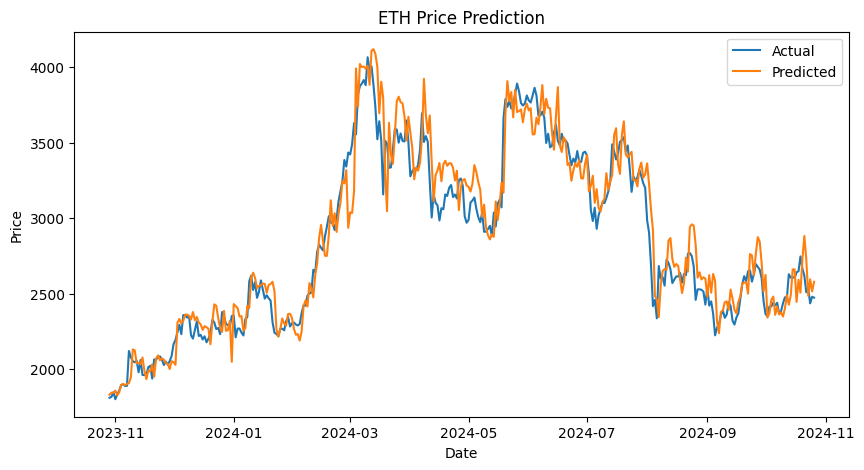

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_train(df_indicators, XGBRegressor())

<ipython-input-67-9db0aaa24180>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

RMSE : 131.38836680848567
Model Score : 0.9460092726476121
 


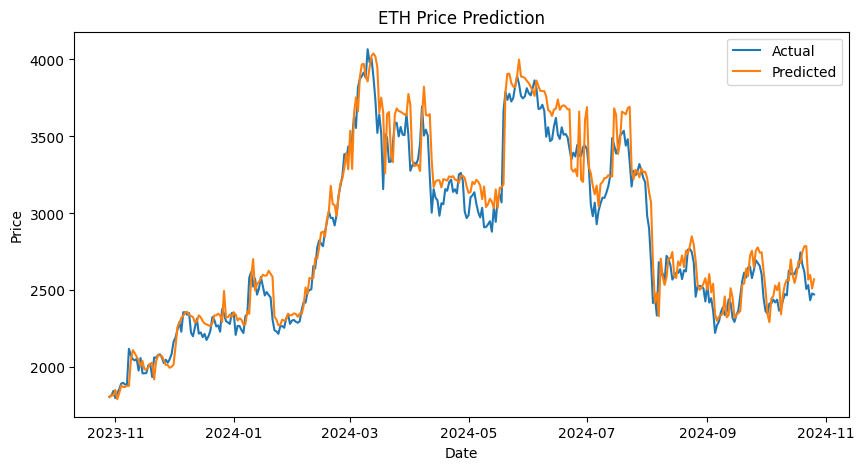

RandomForestRegressor()

In [ ]:
model_train(df_indicators, RandomForestRegressor())

Money Flow Index (MFI)

In [ ]:
df_indicators['eth_money_flow_14'] = df_indicators['Close_eth'] * df_indicators['Volume_eth']
df_indicators['eth_money_flow_14'] = df_indicators['eth_money_flow_14'].rolling(window=14).sum()
df_indicators['eth_money_flow_14'] = df_indicators['eth_money_flow_14'] / df_indicators['Volume_eth'].rolling(window=14).sum()

df_indicators['btc_money_flow_14'] = df_indicators['Close_btc'] * df_indicators['Volume_btc']
df_indicators['btc_money_flow_14'] = df_indicators['btc_money_flow_14'].rolling(window=14).sum()
df_indicators['btc_money_flow_14'] = df_indicators['btc_money_flow_14'] / df_indicators['Volume_btc'].rolling(window=14).sum()

<ipython-input-67-9db0aaa24180>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

RMSE : 162.46264333452453
Model Score : 0.9174508929258762
 


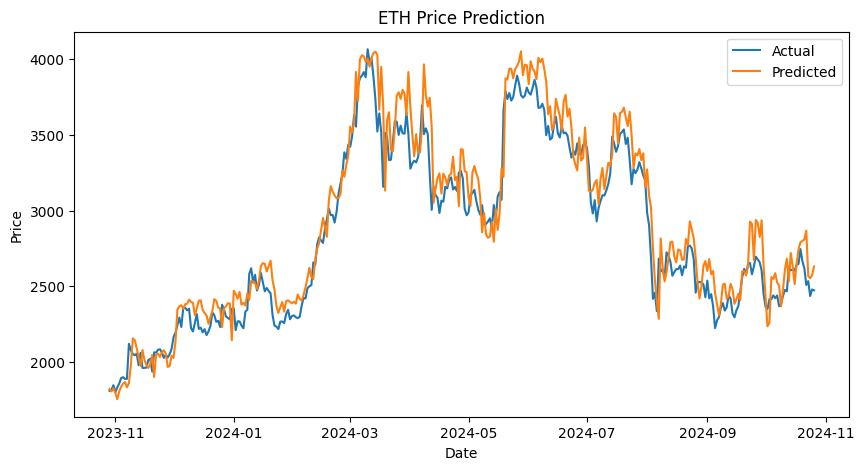

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_train(df_indicators, XGBRegressor())

<ipython-input-67-9db0aaa24180>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

RMSE : 133.93889624709988
Model Score : 0.9438927760852489
 


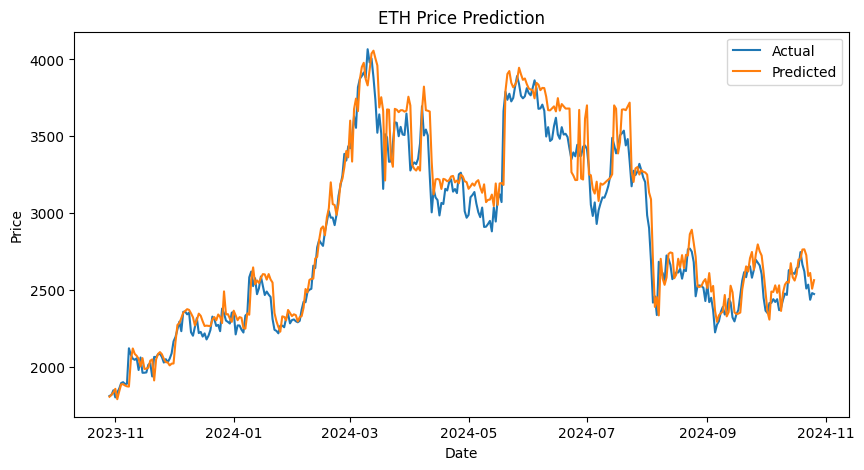

RandomForestRegressor()

In [ ]:
model_train(df_indicators, RandomForestRegressor())

Elder-Ray Index

In [ ]:
df_indicators.dropna(inplace=True)

In [ ]:
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1808 entries, 2019-11-15 to 2024-10-26
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open_eth           1808 non-null   float64
 1   High_eth           1808 non-null   float64
 2   Low_eth            1808 non-null   float64
 3   Close_eth          1808 non-null   float64
 4   Volume_eth         1808 non-null   int64  
 5   Open_btc           1808 non-null   float64
 6   High_btc           1808 non-null   float64
 7   Low_btc            1808 non-null   float64
 8   Close_btc          1808 non-null   float64
 9   Volume_btc         1808 non-null   int64  
 10  Next_day_eth       1808 non-null   float64
 11  eth_MA_3           1808 non-null   float64
 12  btc_MA_3           1808 non-null   float64
 13  eth_MA_3_open      1808 non-null   float64
 14  btc_MA_3_open      1808 non-null   float64
 15  eth_MA_7           1808 non-null   float64
 16  btc_MA_7      

In [ ]:
#Elder-Ray Index
df_indicators['eth_elder_ray_14'] = df_indicators['Close_eth'] - df_indicators['Close_eth'].rolling(window=14).mean()
df_indicators['eth_elder_ray_14'] = df_indicators['eth_elder_ray_14'].rolling(window=14).sum()
df_indicators['eth_elder_ray_14'] = df_indicators['eth_elder_ray_14'] / df_indicators['Close_eth'].rolling(window=14).sum()

df_indicators['btc_elder_ray_14'] = df_indicators['Close_btc'] - df_indicators['Close_btc'].rolling(window=14).mean()
df_indicators['btc_elder_ray_14'] = df_indicators['btc_elder_ray_14'].rolling(window=14).sum()
df_indicators['btc_elder_ray_14'] = df_indicators['btc_elder_ray_14'] / df_indicators['Close_btc'].rolling(window=14).sum()

<ipython-input-67-9db0aaa24180>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

RMSE : 165.42929603749144
Model Score : 0.9128111943645856
 


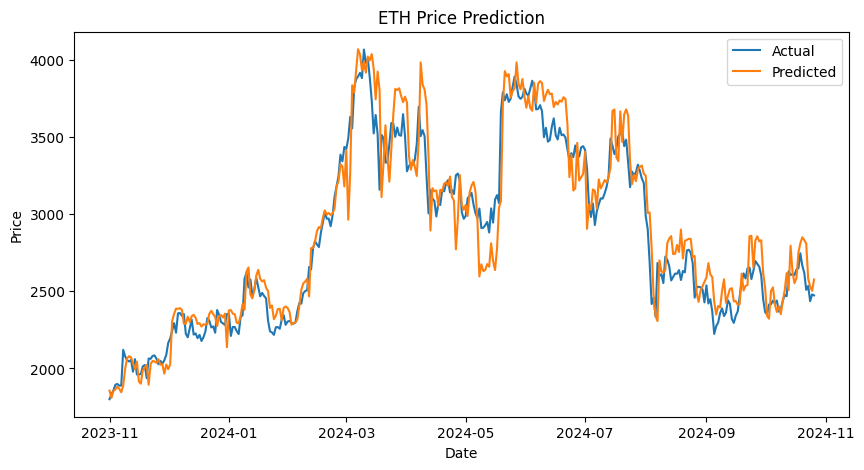

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_train(df_indicators, XGBRegressor())

<ipython-input-67-9db0aaa24180>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-9db0aaa24180>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

RMSE : 132.42991506741245
Model Score : 0.9441262157889009
 


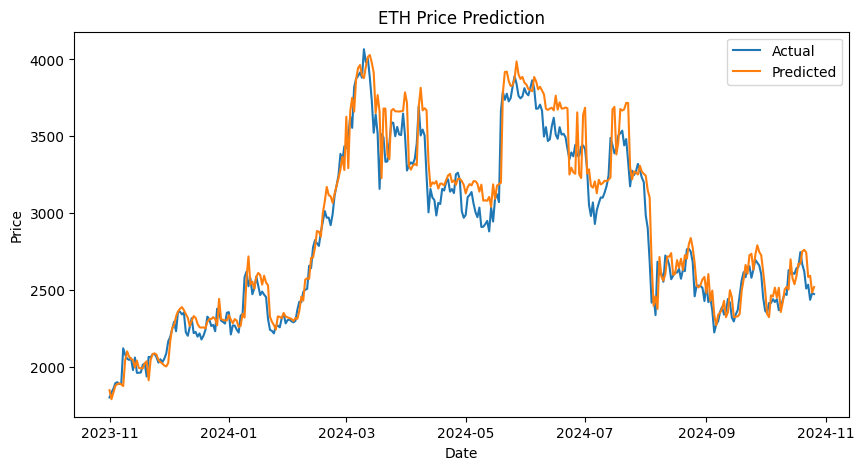

In [ ]:
model = model_train(df_indicators, RandomForestRegressor())

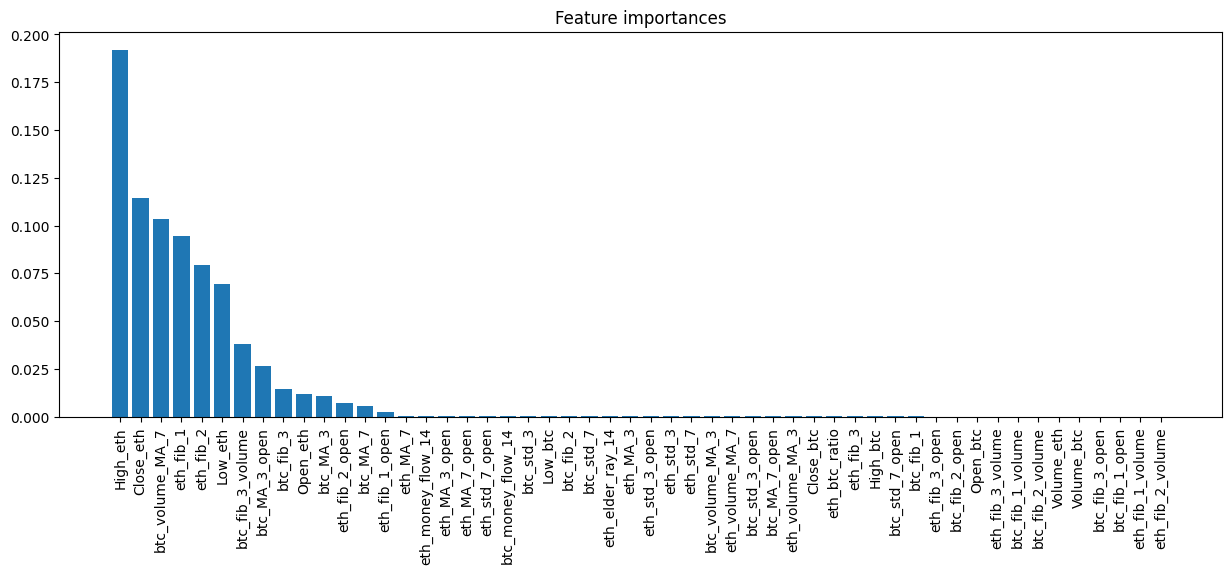

In [ ]:
#plot important features
importances = model.feature_importances_
feature_names = df_indicators.columns
indices = np.argsort(importances)[::-1]

indices = indices[1:]
importances = importances[indices]
feature_names = feature_names[indices]

plt.figure(figsize=(15, 5))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.show()

# Hyperparameter Tuning Using Optuna

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
df = df_indicators.copy()

test_data_lenght = int(len(df) * 0.2)

train_df = df.iloc[:-test_data_lenght]
test_df = df.iloc[-test_data_lenght:]

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

train_target_df = train_df['Next_day_eth']
test_target_df = test_df['Next_day_eth']

train_df.drop(columns=['Next_day_eth'], axis=1, inplace=True)
test_df.drop(columns=['Next_day_eth'], axis=1, inplace=True)

<ipython-input-81-bfeab7290cc5>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-bfeab7290cc5>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-bfeab7290cc5>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-bfeab7290cc5>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 1000)
    max_depth = trial.suggest_int("max_depth", 5, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
    )

    model.fit(train_df, train_target_df)

    predicts = model.predict(test_df)
    rmse = np.sqrt(mean_squared_error(test_target_df, predicts))

    return rmse

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200)

[I 2024-10-27 12:59:43,232] A new study created in memory with name: no-name-d5af037f-e7c7-4d5f-a54f-357d78a0fbfe
[I 2024-10-27 13:00:19,296] Trial 0 finished with value: 148.99262586660976 and parameters: {'n_estimators': 394, 'max_depth': 23, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 148.99262586660976.
[I 2024-10-27 13:00:26,665] Trial 1 finished with value: 121.42967626270975 and parameters: {'n_estimators': 961, 'max_depth': 34, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 121.42967626270975.
[I 2024-10-27 13:00:48,934] Trial 2 finished with value: 122.34436864747454 and parameters: {'n_estimators': 418, 'max_depth': 12, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 121.42967626270975.
[I 2024-10-27 13:00:56,747] Trial 3 finished with value: 171.70530233662538 a

In [ ]:
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Best trial:
  Value: 102.64988318575098
  Params: 
    n_estimators: 70
    max_depth: 21
    min_samples_split: 16
    min_samples_leaf: 10
    max_features: None
    bootstrap: True


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_contour(study)

RMSE :  107.78101504436304
Model Score :  0.9629898859193299
 


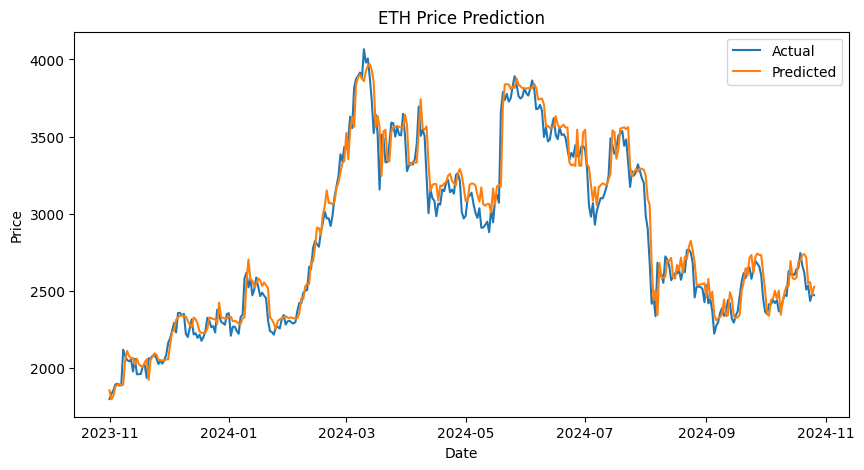

In [ ]:
#predict with best parameters
model = RandomForestRegressor(**study.best_params)
model.fit(train_df, train_target_df)

predicts = model.predict(test_df)
rmse = np.sqrt(mean_squared_error(test_target_df, predicts))
print("RMSE : ", rmse)

#reindex
predicts = pd.Series(predicts, index=test_target_df.index)
test_target_df = pd.Series(test_target_df, index=test_target_df.index)

print("Model Score : ", model.score(test_df, test_target_df))
print(" ")

fig = plt.figure(figsize=(10, 5))
plt.plot(test_target_df, label='Actual')
plt.plot(predicts, label='Predicted')
plt.title('ETH Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()